# Exploratory Data Analysis 

In [385]:
import pandas as pd 
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Traitement du fichier

### Chargement du fichier

In [386]:
filename = "Demandeurs d’emploi inscrits en fin de mois à Pôle emploi par Comune.csv"

data = pd.read_csv(filename,
                   sep=";",
                   skiprows=3,
                   engine='python',
                   skipfooter=1)
# On va supprimer la dernère la colonnes des communes de moins 500 habs
data = data.iloc[:,0:25]

data = data.applymap(lambda x: x.replace(" ",""))

### Standardisation des dates

In [387]:
new_months = pd.date_range(start="6-2016", end="12-2022",name = "Mois",freq="M")
new_months = new_months.strftime("%Y")

### Standardisation des codes postaux 

In [388]:
# Expression régulière pour isoler les codes postaux
# D'abord on a besoin d'isoler les cp
# Ensuite on isole les données

all_but_first = data.columns != "Mois"
data.columns[all_but_first]

def keep_only_cp(x):
    return re.search("\d{5}",x).group(0)

cp_standard = [keep_only_cp(column) for column in data.columns[all_but_first]]

In [389]:
new_data = pd.DataFrame(data.iloc[:,all_but_first].values,new_months)
new_data.columns = cp_standard
x = new_data.astype('int32')

In [390]:
x.to_csv("data_proc.csv")

## Quelques visualisations

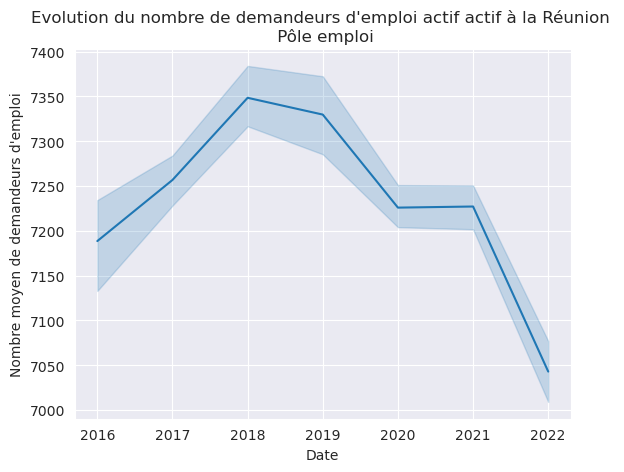

In [391]:
fig, ax = plt.subplots()
mean = x.apply(np.std,axis=1)
sns.lineplot(ax=ax, data = mean)
plt.title("Evolution du nombre de demandeurs d'emploi actif actif à la Réunion \n Pôle emploi")
plt.xlabel("Date")
plt.ylabel("Nombre moyen de demandeurs d'emploi")
plt.show()